SQUAT FORECASTING

Members: Sergio Salvador, Marco Hernani, Helen Navarro, Berta Pfaff

# Exercise - MADRID OPEN DATA

Analysis and data visualization exercise. We will work with data on infractions committed by drivers in the city of Madrid.

## Join the twelve dataframes from January to December into a single dataframe. Shows the total shape of the resulting dataframe.


We read all datasets and join them into a single dataframe

We observe that all datasets had the same columns information, in the same order but some columns names were sligtly different from one dataset to other.
That's why we force the names of the columns. So it's the same for all dataframes, before adding the data to the dataframe with all the information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

We use glob module to search for a specific file pattern. `[glob.glob(path, '2020*.csv')]` returns a list with all csv files that satisfy that pattern.

In [2]:
file_list = glob.glob("Files/2020*.csv")
print('File names:', file_list)
 
csv_list = []

for file in file_list:
    dfaux=pd.read_csv(file,delimiter= ";" , encoding = "latin_1" )
    dfaux=dfaux.set_axis(['CALIFICACION','LUGAR','MES','ANIO','HORA','IMP_BOL','DESCUENTO',
                            'PUNTOS','DENUNCIANTE','HECHO-BOL','VEL_LIMITE','VEL_CIRCULA',
                            'COORDENADA_X', 'COORDENADA_Y'], axis=1)
    csv_list.append(dfaux)
    
df = pd.DataFrame()
 
for csv_file in csv_list:
    df = df.append(csv_file, ignore_index=True)

File names: ['Files\\202001_detalle.csv', 'Files\\202002_detalle.csv', 'Files\\202003_detalle.csv', 'Files\\202004_detalle.csv', 'Files\\202005_detalle.csv', 'Files\\202006_detalle.csv', 'Files\\202007_detalle.csv', 'Files\\202008_detalle.csv', 'Files\\202009_detalle.csv', 'Files\\202010_detalle.csv', 'Files\\202011_detalle.csv', 'Files\\202012_detalle.csv']


C:\Users\marco\AppData\Local\Temp\ipykernel_69048\2309852093.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfaux=pd.read_csv(file,delimiter= ";" , encoding = "latin_1" )
C:\Users\marco\AppData\Local\Temp\ipykernel_69048\2309852093.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(csv_file, ignore_index=True)


In [3]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

In [4]:
df


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993299,LEVE,CL PADRE DAMIAN 19,12,2020,14.14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1993300,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,,,
1993301,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14.30,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1993302,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


Finally We get the shape of the dataframe

In [5]:
df.shape

(1993304, 14)

## As such, we are not going to work with geographic data, delete the __COORDENADA_X__ and __COORDENADA_Y__ columns.


In [6]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

In [7]:
df.drop(["COORDENADA_X", "COORDENADA_Y"], axis=1, inplace=True)
df

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1993299,LEVE,CL PADRE DAMIAN 19,12,2020,14.14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,
1993300,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,
1993301,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14.30,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,
1993302,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,


1993304 rows × 12 columns

## Check the unique values of the variables, there are some of them that do not have unique values, so they are constants, is it worth having them in the dataframe?


We check which columns have constant variables and remove them from the dataframe

In [8]:
columns = df.columns
for column in columns: 
 # How many unique elements does each column have?
    if len(df[column].unique())==1: # If the count gives us equal to one
        print(df[column].unique()) # We print the value
        df.drop(column, axis=1, inplace=True) # and delete the column with a constant value

[2020]
['SI']


In [9]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'HORA', 'IMP_BOL', 'PUNTOS',
       'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA'],
      dtype='object')

## It seems that the __VEL_LIMITE__ and __VEL_CIRCULA__ columns have empty values, this is because if the infraction was not caused by exceeding any speed limit, this value appears empty, change all the anomalies you detect to null. Hint: Investigate how to use regex with a regular expression like r'^\s*$' in the replace function


`r'^\s*$'` this a regular expression (regex) that matches empty lines and white spaces

Regex is a sequence of characters that forms a search pattern.

This code reads: When a value satisfies the regular expression We replace it with NaN.

That's how we substiture all NaN values by zeros, in VEL_LIMITE and VEL_CIRCULA columns

In [10]:
# we put np in front of Nan because there is no Nan in the pandas library.

df.VEL_LIMITE = df.VEL_LIMITE.replace(r'^\s*$', np.NaN, regex= True)
df.VEL_CIRCULA = df.VEL_CIRCULA.replace(r'^\s*$', np.NaN, regex= True)
df


,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,12.18,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,NaN,NaN
1,GRAVE,AV BADAJOZ 5,1,9.46,200.0,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,NaN,NaN
2,LEVE,ARISTOTELES 7 POSTERIOR,1,13.55,90.0,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,NaN,NaN
3,LEVE,ARISTOTELES 7 POSTERIOR,1,14.00,90.0,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,NaN,NaN
4,LEVE,VIRGEN DE LLUC 70,1,12.12,90.0,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1993299,LEVE,CL PADRE DAMIAN 19,12,14.14,90.0,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",NaN,NaN
1993300,LEVE,CL JUAN RAMON JIMENEZ 2,12,14.23,90.0,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,NaN,NaN
1993301,LEVE,CL JUAN RAMON JIMENEZ 15,12,14.30,90.0,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",NaN,NaN
1993302,LEVE,CL VICTOR DE LA SERNA 1,12,9.51,90.0,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",NaN,NaN


To check that the NaN values are equal to the number of total rows without the number of fields with a value that is not a NaN: 

Total number of rows in the df - sum of frequencies of VEL_LIMIT = Number of NaN values

In [11]:
df.value_counts(df.VEL_LIMITE)

VEL_LIMITE
 70    259747
 90     92510
 50     72859
70       6574
 80      3688
 40      2472
 60      2188
90       1892
 30      1343
50        177
 20         1
dtype: int64

We get the number of NaN values in the column VEL_LIMITE

In [12]:
NaN_values = df['VEL_LIMITE'].isna().sum()
NaN_values

1549853

We get the total number of rows

In [13]:
total_rows = df.shape[0]
total_rows

1993304

We get the count of all values that are different to NaN

In [14]:
not_NaN_values = df.value_counts(df.VEL_LIMITE).sum()
not_NaN_values

443451

In [15]:
total_rows - not_NaN_values == NaN_values

True

## The two columns __VEL_LIMITE__ and __VEL_CIRCULA__ despite being two purely numerical columns, are recognized as "object" type, check the frequency of values, you will see that they are counted as text strings, therefore:

- Change the nulls of the two variables to 0

- Change the type of the variable to numeric

- What is the most repeated speed limit other than zero?


VEL_LIMITE and VEL_CIRCULA are reconnized as "object" type because those columns contain null values

In [16]:
df.loc[:, ["VEL_LIMITE", "VEL_CIRCULA"]].dtypes

VEL_LIMITE     object
VEL_CIRCULA    object
dtype: object

### We replace all the NaN with 0

In [17]:
df.VEL_LIMITE = df.VEL_LIMITE.replace(np.NaN, 0)
df.VEL_CIRCULA = df.VEL_CIRCULA.replace(np.NaN, 0)

### We change the type of the column variables to integer

In [18]:
df.VEL_LIMITE = df.VEL_LIMITE.astype(int)
df.VEL_CIRCULA = df.VEL_CIRCULA.astype(int)
df.loc[:, ["VEL_LIMITE", "VEL_CIRCULA"]].dtypes

VEL_LIMITE     int32
VEL_CIRCULA    int32
dtype: object

### The most repeated speed limit is 70

In [19]:
df.value_counts(df.VEL_LIMITE)

VEL_LIMITE
0     1549853
70     266321
90      94402
50      73036
80       3688
40       2472
60       2188
30       1343
20          1
dtype: int64

In [20]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'HORA', 'IMP_BOL', 'PUNTOS',
       'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA'],
      dtype='object')

## Generate a new column called DIFFERENCE_KMH that is the result of subtracting from each value of the speed at which the driver was circulating the speed limit at which the infraction occurred, to obtain a top 10 of the drivers who exceeded the limits to higher speed

We have then proceeded to create a column called DIFFERENCE_KMH in which the difference between the circulation velocity (VEL_CIRCULA) and the limit velocity (VEL_LIMIT).

In [21]:
df["DIFFERENCE_KMH"]= df["VEL_CIRCULA"] - df["VEL_LIMITE"]

Finally We obtain the top 10 of drivers that exceeded more the limit of velocity.

In [22]:
df.sort_values("DIFFERENCE_KMH", ascending=False).head(10)

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
448783,GRAVE,"M 30 FT KM 4,150 CR 1",3,23.43,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
1293088,GRAVE,"M 30 XC KM 10,300 CR 3",9,23.25,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
1671450,GRAVE,"M 30 KM 6,700 CR 3 CALZADA 1",11,7.53,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1293087,GRAVE,"M 30 KM 7,800 CALZADA 2",9,1.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
293196,GRAVE,M 30 KM 27 DECRECIENTE C 2,2,4.57,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1480910,GRAVE,M 30 KM 27 CARRIL 2 CALZADA 2,10,2.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
479076,GRAVE,"M 30 FT KM 4,150 CR 4",3,20.23,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
293195,GRAVE,"M 30 FT PK 4,150 CR 4",2,14.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
913637,GRAVE,"M 30 KM 0,500 CALZADA 1",7,5.26,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
1480909,GRAVE,"M 30 KM 6,700 CALZADA 1 CR 3",10,2.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69


## Obtain a dataframe filtered by all the complaints that have led to the withdrawal of points (that is, points other than zero). Group the dataframe filtered by the public agent that issues the complaint, which of all the public agents has a higher average point withdrawal?


In [23]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'HORA', 'IMP_BOL', 'PUNTOS',
       'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'DIFFERENCE_KMH'],
      dtype='object')

We have obtained the unique values from the list PUNTOS to see how many points can be taken off for a fine.

In [24]:
df.PUNTOS.unique()

array([3, 0, 4, 6, 2], dtype=int64)

We converted the whitespace values, which were not numbers, to NaN and then transformed the NaN values to 0. 
Subsequently, we have transformed all the values in the PUNTOS column to integer.
And with the function value_counts() we have obtained the total sum according to the number of points. 

In [25]:
df.PUNTOS = df.PUNTOS.replace(r'^\s*$', np.NaN, regex= True)
df.PUNTOS = df.PUNTOS.replace(np.NaN, 0, regex= True)

df.PUNTOS  = df.PUNTOS.astype(int)
df.value_counts(df.PUNTOS)

PUNTOS
0    1932478
4      24738
2      22439
3       7708
6       5941
dtype: int64

We check if the column data type was changed correctly

In [26]:
df.PUNTOS.dtypes

dtype('int32')

We get just the rows with fines that result in the lose of points.

In [27]:
#We get just rows were points value is different to 0
df_points= df[df.PUNTOS!=0]
df_points

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
0,GRAVE,ALFONSO XII,1,12.18,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
11,GRAVE,FRANCISCO VILLAESPESA 53,1,12.54,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
17,GRAVE,CALLE 30 CALZADA 1 A 5,1,16.45,200.0,4,POLICIA MUNICIPAL,CIRCULAR SIN RESPETAR LA DISTANCIA MÍNIMA DE S...,0,0,0
25,GRAVE,ALBERTO AGUILERA,1,23.20,200.0,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
87,GRAVE,GT PTA TOLEDO-TOLEDO,1,18.18,200.0,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1983140,GRAVE,ORENSE 21,12,19.58,200.0,3,POLICIA MUNICIPAL,EFECTUAR UN CAMBIO DE SENTIDO PROHIBIDO. ...,0,0,0
1983141,MUY GRAVE,GTA EMILIO CASTELAR SN,12,6.43,1000.0,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMIT...,0,0,0
1983143,GRAVE,PZ FERNANDEZ LADREDA,12,19.05,200.0,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
1983144,GRAVE,ALCALA 406,12,18.15,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0


We group by the public agents that make the complaint and sum the total of points that each one took.
This way We can see who is the public agency that took more points.

In [28]:
#We group by the DENUNCIANTE column and sum all points for each public agency
df_points.groupby("DENUNCIANTE").sum()

,MES,HORA,IMP_BOL,PUNTOS,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
DENUNCIANTE,,,,,,,
AGENTES DE MOVILIDAD,125823,245714.17,3621900.0,68437,12750,19382,6632
POLICIA MUNICIPAL,273693,544027.00,15306100.0,134163,1525090,2347810,822720


As what we are interested in are the quantities in the PUNTOS column, we get just this column.

In [29]:
points_taken = df_points.groupby("DENUNCIANTE").sum()["PUNTOS"]
points_taken

DENUNCIANTE
AGENTES DE MOVILIDAD     68437
POLICIA MUNICIPAL       134163
Name: PUNTOS, dtype: int32

The sum of all the values in the POINTS column has been calculated, to confirm that it is the same amount as the sum of the values for AGENTES DE MOVILIDAD and POLICIA MUNICIPAL.

In [30]:
total_points_taken = df_points.PUNTOS.sum()
total_points_taken

202600

In [31]:
points_taken.sum() == total_points_taken

True

## Eliminate the decimal part from the hour column, then, shows graphically in which hours more fines have occurred.


The values of the HORA column have been transformed to integer so that it loses the decimal part and has been stored in the hours variable to be able to work with this data in a more manageable way.

The `value_counts()` function has been applied to see the result of the sum of the number of times it appears each hour. 

To create the barplot, for the x-axis, we have taken the hours and in the y-axis we have taken the fines.


In [32]:
df.HORA = df.HORA.astype(int)
hours = df.HORA

#We obtain the axis values from here
#numbers of fines taken at each hour
print(hours.value_counts())



10    173426
13    172800
11    166508
12    161114
9     153981
17    141545
14    138095
18    127773
16    124344
19    123612
20    101182
15     99054
8      59261
21     54539
22     38074
23     31988
7      31842
0      29284
1      17987
6      16999
2      10675
5       7081
3       6549
4       5591
Name: HORA, dtype: int64


We make use of the libraries MATPLOTLIB and SEABORN to the plotting


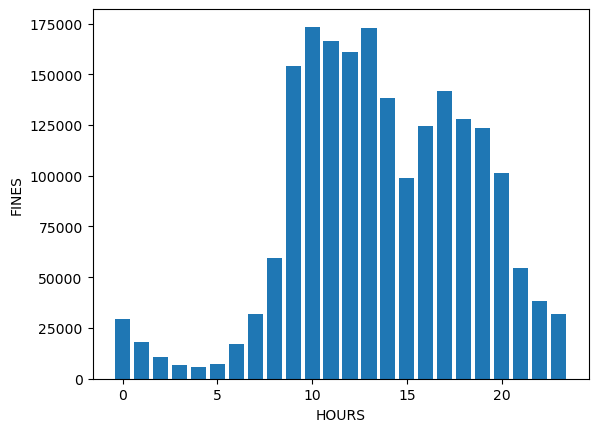

In [33]:
plt.bar(hours.value_counts().keys().tolist(), hours.value_counts().tolist())

plt.xlabel("HOURS")
plt.ylabel("FINES")

plt.show()

We can observe that more fines were taken near the noon.

## Graphically shows the fines made during the months of 2020. Knowing that the confinement in Spain began in March of that year, is the effect of the pandemic noticeable?


We obtain the total count of fines taken in each month. To do it We used the function count.plot() has been applied, which gives the count of the number of repeated values in the column MONTH. 

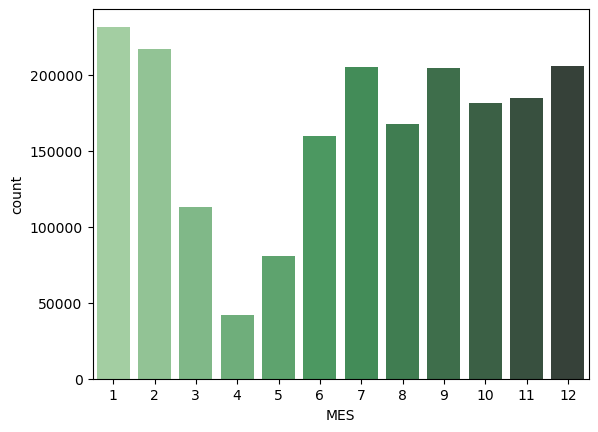

In [34]:
#Plots the count of rows for each MONTH in the dataframe in green degraded
sns.countplot(x= "MES", data= df, palette= "Greens_d")

plt.show()

## Shows graphically the number of infractions (without accumulated frequency), of each of the public agents based on the classification of the infraction

We use again the `countplot()` function to plot to show how many fines of each rating there is.
But this time We separate by public agency each in rating count.

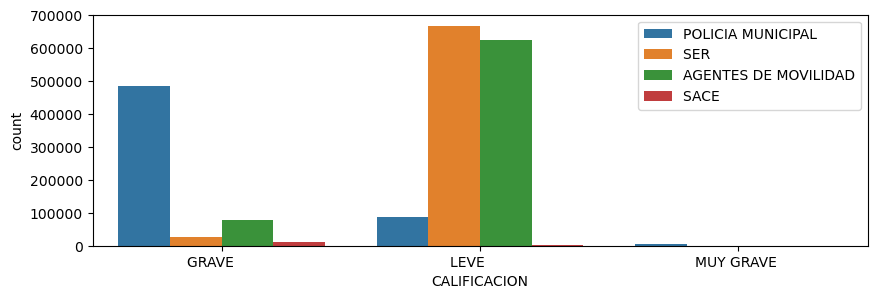

In [45]:
#We change the size of the plot so it can be full viewed 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)


#plots the count of fines of each rating for each public agency
#with a legend that indicates which public agency has make the complaint
sns.countplot(data = df, x = "CALIFICACION", hue = df.DENUNCIANTE, orient="h")

#We choose to put the legend at a position that let the result be viewed
plt.legend(loc='upper right')
plt.show()

We observe that POLICIA MUNICIPAL is the one that makes more complaints serious complaints.
SER and AGENTES DE MOVILIDAD are the agencies that make more minor complaints.